In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import xgboost as xgb
from xgboost import XGBClassifier, plot_importance, cv
import matplotlib.pyplot as plt

In [2]:
def adversarial(train, test):
    # add train, test label
    train["AV"] = 0
    test["AV"] = 1

    # merge train, test
    df1 = pd.concat([train, test], ignore_index = True)

    # shuffle data
    df1_shuffled = df1.sample(frac=1)

    # create XGBoost data structure
    X = df1_shuffled.drop(['AV'], axis=1)
    y = df1_shuffled['AV']
    XGBdata = xgb.DMatrix(data = X, label = y)

    # XGBoost parameters
    params = {
        "objective": "binary:logistic",
        "eval_metric": "logloss",
        'learning_rate': 0.05,
        'max_depth': 5
        }

    # perform cross validation with XGBoost
    cross_val_results = cv(
        dtrain = XGBdata,
        params = params, 
        nfold = 5,
        metrics = "auc", 
        num_boost_round = 200,
        early_stopping_rounds = 20,
        as_pandas = True
        )

    # final result
    print("Accuracy:", cross_val_results["test-auc-mean"].iloc[-1])


    classifier = XGBClassifier(eval_metric = 'logloss', use_label_encoder = False)
    classifier.fit(X, y)
    fig, ax = plt.subplots(figsize=(10, 7))
    plot_importance(classifier, ax=ax, max_num_features = 10, height  = 0.5)
    plt.show()

Accuracy: 0.9999961493125111


c:\Users\tzuli\Documents\python\.venv\lib\site-packages\xgboost\sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


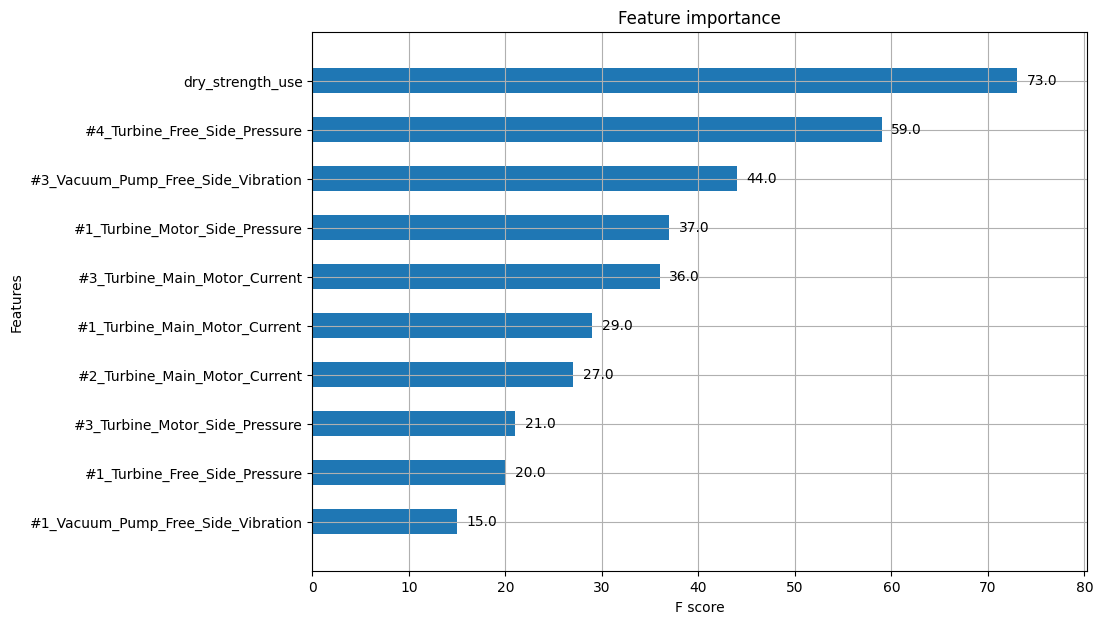

In [3]:
df0 = pd.read_csv("data/paper.csv")

# remove target
df0 = df0.iloc[:, 5:]
df = df0.copy()

# split train, test
train, test = train_test_split(df, test_size = 0.2, shuffle = False)

# adversarial validation
adversarial(train, test)